In [12]:
from PIL import Image
import cv2
import numpy as np
import requests

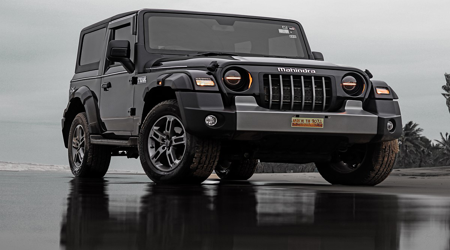

In [29]:
image = Image.open(requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Mahindra_Thar_Photoshoot_At_Perupalem_Beach_%28West_Godavari_District%2CAP%2CIndia_%29_Djdavid.jpg/1200px-Mahindra_Thar_Photoshoot_At_Perupalem_Beach_%28West_Godavari_District%2CAP%2CIndia_%29_Djdavid.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

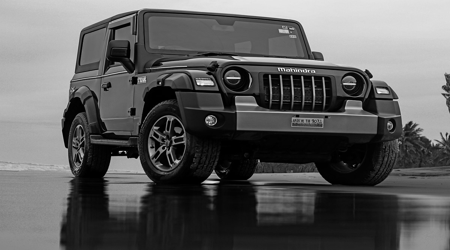

In [30]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

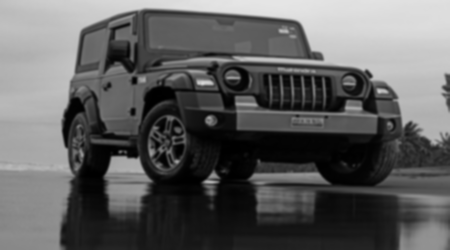

In [31]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

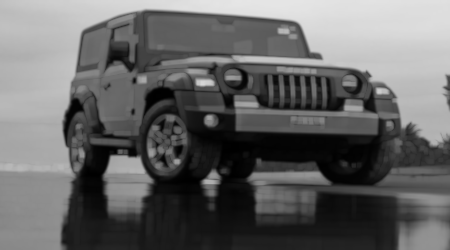

In [32]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

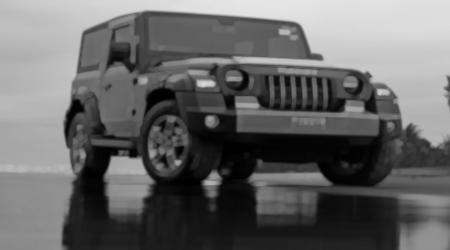

In [33]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [36]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.2, 1)
cars

array([[419, 161,  24,  24]])

1  cars found


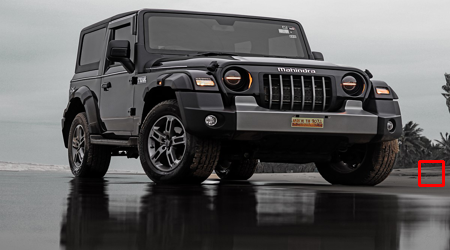

In [37]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)